In [ ]:
import tensorflow 
print(tensorflow.__version__)

In [5]:
import keras 
from keras.models import Sequential #whether you create ann,cnn,nn,rnn u have to import this because it is responsible for creating nn
from keras.layers import Dense # 
from keras.layers import LeakyReLU , ELU
from keras.layers import Dropout #regulariztion aparameter
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [6]:

df=pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [8]:
df.Exited.value_counts()   # imbalance dataset 


0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
#Create dummy variables
geography=pd.get_dummies(x["Geography"],drop_first=False)#drop first is the no of columns u want , if it is false , it will take column= no of categories , if it is true it will take column= no of categories - 1
gender=pd.get_dummies(x['Gender'],drop_first=True)# her ewe have m / f , so turning to 1 column , this drop_first true means it will reduce the column ie 2 categories to 1

In [10]:
geography.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [11]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [12]:

## Concatenate the Data Frames
x=pd.concat([x,geography,gender],axis=1)

In [13]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
## Drop Unnecessary columns
x=x.drop(['Geography','Gender'],axis=1)

In [15]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
print(df.shape)
print(x.shape)
print(y.shape)

(10000, 14)
(10000, 12)
(10000,)


In [17]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [18]:
pip install scikit-learn==0.21.2 --upgrade

Requirement already up-to-date: scikit-learn==0.21.2 in /usr/local/lib/python3.6/dist-packages (0.21.2)


In [19]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.wrappers.scikit_learn import KerasClassifier
import sklearn


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
print(sklearn.__version__)

0.21.2


In [18]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x.shape[1]))
            model.add(Activation(activation))
            
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.1))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parametrr
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']

layers = [[6,6,8,10]]
activations = ['relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [10,15,20], epochs=[10,25,50])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=3)



In [ ]:
grid_result = grid.fit(X_train, y_train)



In [ ]:
[grid_result.best_score_,grid_result.best_params_]

[0.8576250136196614,
 {'activation': 'relu',
  'batch_size': 20,
  'epochs': 50,
  'layers': [6, 6, 8, 10]}]

In [ ]:
pip install tensorflow==2.2.0

In [ ]:
!pip install tensor-dash

In [ ]:
!git clone https://github.com/CleanPegasus/TensorDash.git

In [ ]:
%cd /content/TensorDash

In [ ]:
!python setup.py install

In [ ]:
pip install Tensordash

In [ ]:
!pip install firebasedata

In [26]:
from tensordash.tensordash import Tensordash
histories = Tensordash(
    ModelName = 'Remote Monitoring',
    email = 'edugan28@gmail.com')



Enter Tensordash Password :··········


In [39]:
classifier_new=Sequential()
classifier_new.add(Dense(units=6, kernel_initializer = 'he_normal',activation='elu',input_dim = 12))
#classifier_new.add(Dropout(0.1))
classifier_new.add(Dense(units=6, kernel_initializer='he_normal',activation='elu'))
#classifier_new.add(Dropout(0.2))
classifier_new.add(Dense(units=8, kernel_initializer='he_normal',activation='elu'))
classifier_new.add(Dropout(0.1))
classifier_new.add(Dense(units=10, kernel_initializer='he_normal',activation='elu'))
classifier_new.add(Dropout(0.1))
classifier_new.add(Dense(units=1, kernel_initializer='glorot_normal',activation='sigmoid'))

In [40]:
classifier_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 56        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                90        
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                

In [41]:
classifier_new.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [42]:
model_history_new=classifier_new.fit(X_train, y_train,validation_split=0.33, batch_size = 20, epochs=55,callbacks=[histories])

Epoch 1/55
268/268 [==============================] - 1s 4ms/step - loss: 0.5424 - accuracy: 0.7464 - val_loss: 0.4720 - val_accuracy: 0.8061
Epoch 2/55
268/268 [==============================] - 1s 4ms/step - loss: 0.4651 - accuracy: 0.8000 - val_loss: 0.4377 - val_accuracy: 0.8145
Epoch 3/55
268/268 [==============================] - 1s 4ms/step - loss: 0.4236 - accuracy: 0.8222 - val_loss: 0.4158 - val_accuracy: 0.8194
Epoch 4/55
268/268 [==============================] - 1s 4ms/step - loss: 0.4050 - accuracy: 0.8259 - val_loss: 0.3991 - val_accuracy: 0.8270
Epoch 5/55
268/268 [==============================] - 1s 4ms/step - loss: 0.3866 - accuracy: 0.8397 - val_loss: 0.3896 - val_accuracy: 0.8296
Epoch 6/55
268/268 [==============================] - 1s 4ms/step - loss: 0.3849 - accuracy: 0.8425 - val_loss: 0.3850 - val_accuracy: 0.8338
Epoch 7/55
268/268 [==============================] - 1s 4ms/step - loss: 0.3774 - accuracy: 0.8418 - val_loss: 0.3796 - val_accuracy: 0.8379
Epoch 

In [31]:
from sklearn.metrics import accuracy_score

In [43]:

y_pred = classifier_new.predict(X_test)
y_pred=y_pred>0.5
acc=accuracy_score(y_test,y_pred)
acc

0.8675

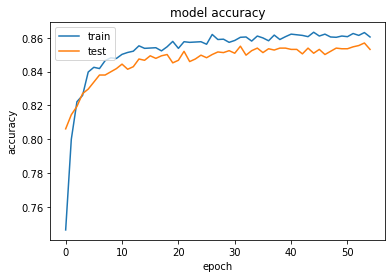

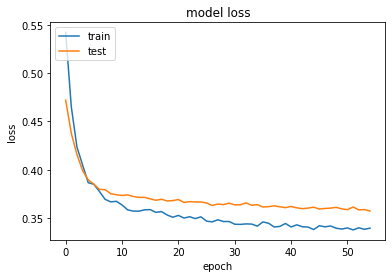

In [44]:
plt.plot(model_history_new.history['accuracy'])
plt.plot(model_history_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history_new.history['loss'])
plt.plot(model_history_new.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [46]:
cm

array([[1537,   58],
       [ 207,  198]])

In [48]:
from sklearn.metrics import balanced_accuracy_score
bal_acc=balanced_accuracy_score(y_test,y_pred)
bal_acc

0.7262626262626263